In [1]:
import argparse
import os
import numpy as np
import torch
# from trainer import dice
from dataset import get_loader
from model.unet3d import UNet3D
from monai.inferers import sliding_window_inference
from monai.networks.nets import SegResNet

DATAROOT='/mnt/nas/CVAI_WLY/CVAI_350_sclices/CVAI_V5'

In [2]:
def dice(x, y):
    intersect = np.sum(np.sum(np.sum(x * y)))
    y_sum = np.sum(np.sum(np.sum(y)))
    if y_sum == 0:
        return 0.0
    x_sum = np.sum(np.sum(np.sum(x)))
    return 2 * intersect / (x_sum + y_sum)

In [4]:
pretrained_pth='/home/cvlab4090wly/HD/Segmodels/3dUnet/checkpoints/epocd_143_metric_model.pth'
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataloader, train_dataset, val_dataloader, val_dataset = get_loader(DATAROOT)

model_dict = torch.load(pretrained_pth)
model = UNet3D(in_channels=1 , num_classes= 5).to(device)
# model = SegResNet(
#         blocks_down=[1, 2, 2, 4],
#         blocks_up=[1, 1, 1],
#         init_filters=16,
#         in_channels=1,
#         out_channels=5,
#         dropout_prob=0.2,
#     ).to(device)

# model = SwinUNETR(
#         img_size=IMG_SIZE,
#         in_channels=IN_CHANNELS,
#         out_channels=OUT_CHANNELS,
#         feature_size=48,
#         use_checkpoint=False,
#     ).to(device)

model.load_state_dict(model_dict)
model.eval()
model.to(device)

with torch.no_grad():
    dice_list_case = []
    for i, batch in enumerate(val_dataloader):
        val_inputs, val_labels = (batch["image"].cuda(), batch["label"].cuda())
        # img_name = batch["image_meta_dict"]["filename_or_obj"][0].split("/")[-1]
        # print("Inference on case {}".format(img_name))
        val_outputs = sliding_window_inference(val_inputs, (96, 96, 96), 4, model, overlap=0.5)
        # val_outputs = torch.softmax(val_outputs, 1).cpu().numpy()
        # val_outputs = np.argmax(val_outputs, axis=1).astype(np.uint8)
        # val_labels = val_labels.cpu().numpy()[:, 0, :, :, :]
        # dice_list_sub = []
        # for i in range(1, 6):
        #     organ_Dice = dice(val_outputs[0] == i, val_labels[0] == i)
        #     dice_list_sub.append(organ_Dice)
        # mean_dice = np.mean(dice_list_sub)
        # print("Mean Organ Dice: {}".format(mean_dice))
        # dice_list_case.append(mean_dice)


len(train): 143
len(val): 2


<class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:meta_keys: Argument `meta_keys` has been deprecated since version 0.9. not needed if image is type `MetaTensor`.
monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
GDCMSeriesFileNames (0x5602dd101650): No Series were found



RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/io/dictionary.py", line 164, in __call__
    data = self._loader(d[key], reader)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/io/array.py", line 263, in __call__
    img = reader.read(filename)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/data/image_reader.py", line 241, in read
    raise FileNotFoundError(f"no DICOMs in: {name}.")
FileNotFoundError: no DICOMs in: /mnt/nas/CVAI_WLY/CVAI_350_sclices/CVAI_V5/CVAI-2662-20140805-1mm/segmentations.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/compose.py", line 322, in __call__
    result = execute_compose(
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/compose.py", line 111, in execute_compose
    data = apply_transform(
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.io.dictionary.LoadImaged object at 0x7f30f4345b50>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/data/dataset.py", line 109, in __getitem__
    return self._transform(index)
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/data/dataset.py", line 95, in _transform
    return apply_transform(self.transform, data_i) if self.transform is not None else data_i
  File "/home/cvlab4090wly/.local/share/hatch/env/virtual/cvlab4090wly/lib/python3.9/site-packages/monai/transforms/transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x7f3094a2b3d0>


GDCMSeriesFileNames (0x5602dd101650): No Series were found



In [20]:
val_outputs.shape

torch.Size([1, 5, 96, 96, 96])

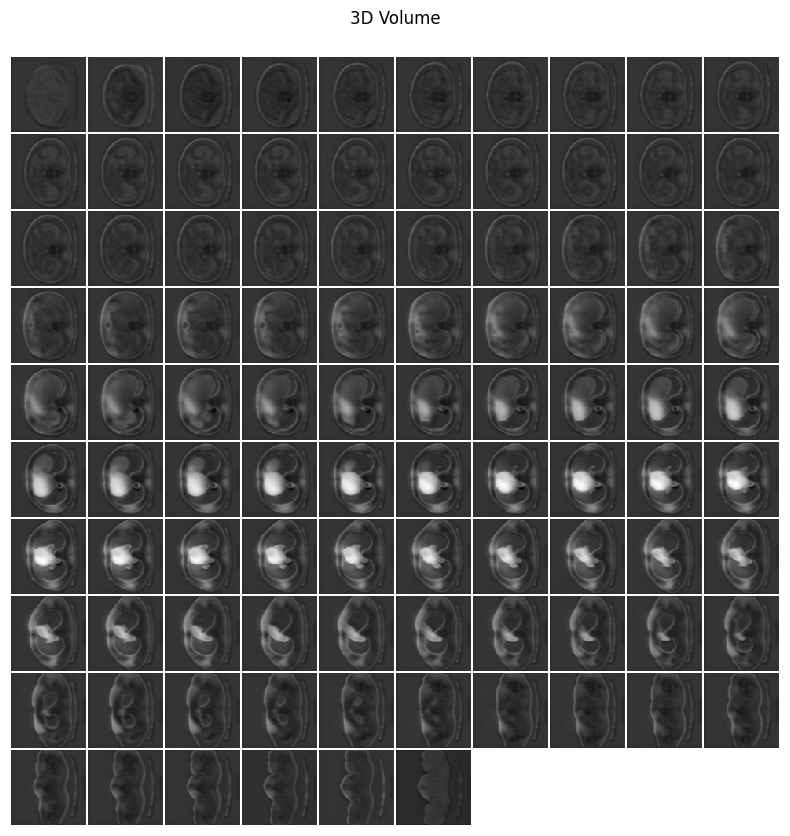

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
from monai.visualize import matshow3d
fig = plt.figure()
matshow3d(val_outputs[0][0].cpu(), fig=fig, title="3D Volume",frame_dim=-1,cmap='gray')
plt.show()

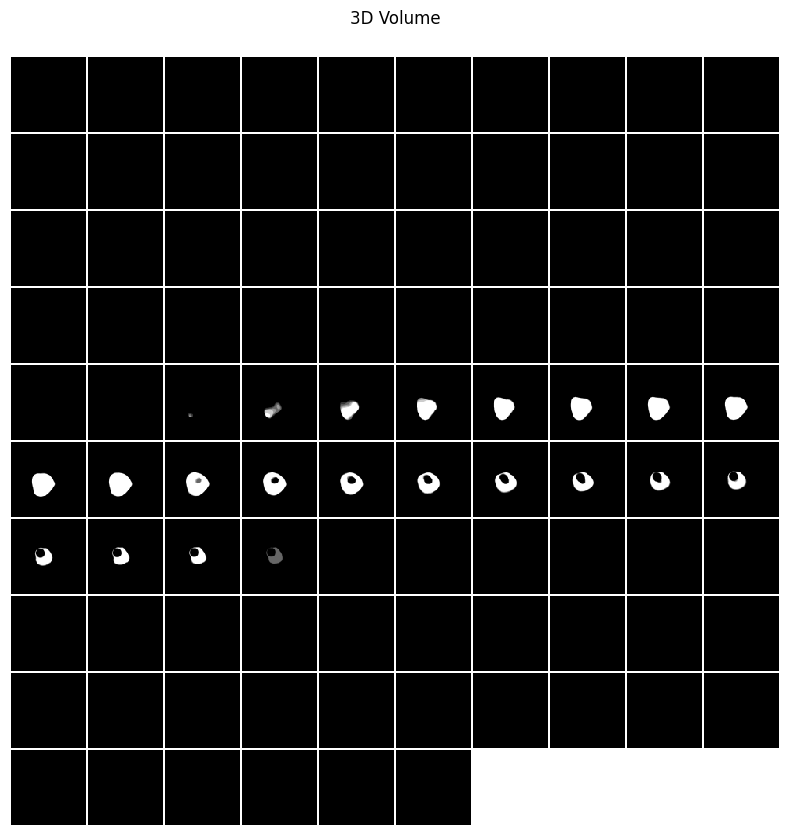

In [25]:
fig = plt.figure()
matshow3d(val_labels[0][0].cpu(), fig=fig, title="3D Volume",frame_dim=-1,cmap='gray')
plt.show()

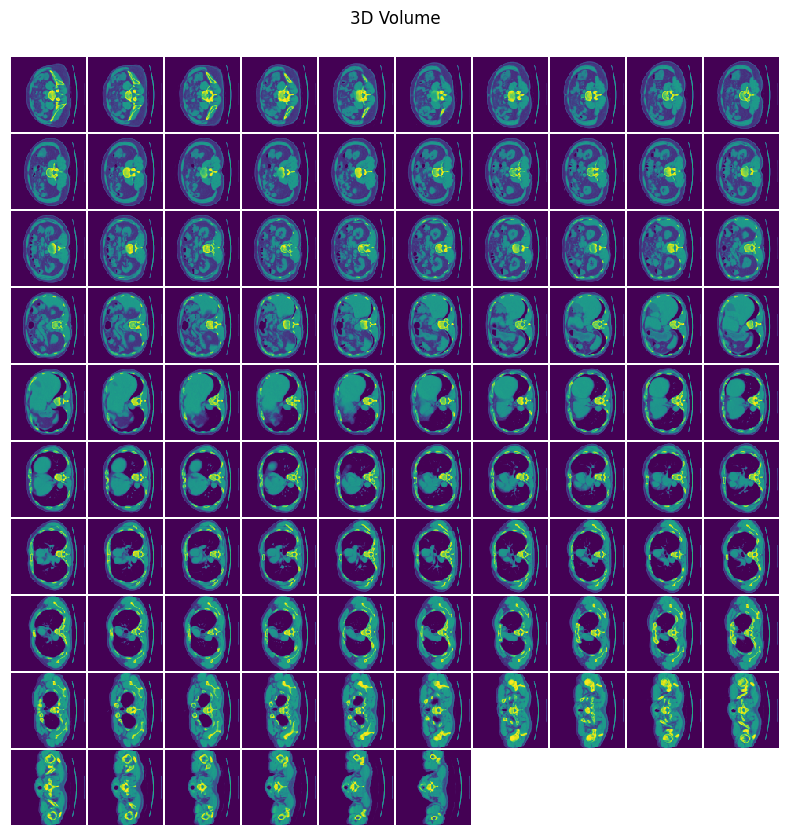

In [17]:
fig = plt.figure()
matshow3d(val_inputs[0][0].cpu(), fig=fig, title="3D Volume",frame_dim=-1)
plt.show()

NameError: name 'plt' is not defined